In [1]:
import pygad
import pygad.nn
import pygad.gann
import numpy
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
NUM_ROUNDS = 10
NUM_GAMES = 100
EVAL_GAMES = 20

PAYOFFS = {          # :}
    (0, 0): (1, 1),  # Both cooperate
    (0, 1): (10, 0),  # Player A cooperates, Player B defects
    (1, 0): (0, 10),  # Player A defects, Player B cooperates
    (1, 1): (5, 5)   # Both defect
}

fit_history = []

<div style="text-align:center">
    <img src="image.png" alt="drawing" width="750"/>
</div>

In [3]:
# create a model

MEMORY_SIZE = 10 # can remember last memory_size rounds
NUM_SOLUTION = 50 # number of people in the network

NUM_INPUT = NUM_ROUNDS * 2

NUM_GENERATIONS = 100 # Number of generations.
NUM_PARENTS_MATING = 10 # Number of solutions to be selected as parents in the mating pool.

# memory array holds memory of all instances
g_memory_array = numpy.zeros(shape=(NUM_SOLUTION, NUM_SOLUTION, MEMORY_SIZE)) - 1 
g_buffer_memory_array = numpy.zeros(shape=(NUM_SOLUTION, NUM_SOLUTION, MEMORY_SIZE)) - 1 

gann_instance = pygad.gann.GANN(num_solutions=NUM_SOLUTION,
                                num_neurons_input=NUM_INPUT,
                                num_neurons_hidden_layers=[10],
                                num_neurons_output=1, # 0 for cooperation and 1 for defection
                                hidden_activations="relu",
                                output_activation="sigmoid")

population_vectors = pygad.gann.population_as_vectors(population_networks=gann_instance.population_networks)
initial_population = population_vectors.copy()

## Layout of the memory
<div style="text-align:center">
    <img src="memory.png" alt="drawing" width="750"/>
</div>

In [4]:
def fitness_func(ga_instance, solution, sol_idx):
    if sol_idx == None: # the docs say that this is needed
        sol_idx = 1
        
    global gann_instance, g_memory_array, g_buffer_memory_array

    results = 0
    # enumerate all other instances (yes i know with caching this could be made much more efficent but im lazy)
    for i in range(len(ga_instance.population)):
        # get the memory of the opponent
        own_memory = g_memory_array[sol_idx][i]
        opponent_memory = g_memory_array[i][sol_idx]

        # preparet the data for the two NN
        opponent_data = numpy.concatenate((opponent_memory, own_memory)).reshape((1, NUM_ROUNDS * 2))
        own_data = numpy.concatenate((own_memory, opponent_memory)).reshape((1, NUM_ROUNDS * 2))

        # predict !
        opponent_prediction = pygad.nn.predict(last_layer=gann_instance.population_networks[i], data_inputs=opponent_data, problem_type="regression")[0]
        own_prediction = pygad.nn.predict(last_layer=gann_instance.population_networks[sol_idx], data_inputs=opponent_data, problem_type="regression")[0]

        # save the results but into a buffer
        g_buffer_memory_array[sol_idx][i] = numpy.append(own_memory, own_prediction)[1:] 
        

        # see the result in the payoff matrix
        results -= PAYOFFS[(1 if own_prediction > 0.5 else 0, 1 if opponent_prediction > 0.5 else 0)][0] # this is always player 1

    return results

def do_graph(title):
    colors = ['green', 'red']
    cmap = ListedColormap(colors)
    fig, axes = plt.subplots(1, NUM_SOLUTION, figsize=(50, 5), gridspec_kw={'wspace': 0.1})
    for i, ax in enumerate(axes):
        binary_mask = g_memory_array[i] > 0.5
        ax.imshow(binary_mask, cmap=cmap, interpolation='nearest')
        ax.axis('off') 
    plt.title(title)
    plt.show()

def callback_generation(ga_instance):
    global g_memory_array, gann_instance   
   
    population_matrices = pygad.gann.population_as_matrices(population_networks=gann_instance.population_networks,
                                                            population_vectors=ga_instance.population)

    gann_instance.update_population_trained_weights(population_trained_weights=population_matrices)

    # before updateing global memory do the fitness calculation
    fit_history.append(numpy.mean(ga_instance.cal_pop_fitness()))
    # also update the global memory
    g_memory_array = g_buffer_memory_array

    if ga_instance.generations_completed % 5 == 0:
        do_graph(f"Avg fitness {fit_history[-1]}")


    print(f"\\\\\\\\\\\\\\\\\\\\ Starting Generation {ga_instance.generations_completed} //////////")
    #print(g_memory_array)
    

C:\Users\janlu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


\\\\\\\\\\ Starting Generation 1 //////////
\\\\\\\\\\ Starting Generation 2 //////////
\\\\\\\\\\ Starting Generation 3 //////////
\\\\\\\\\\ Starting Generation 4 //////////


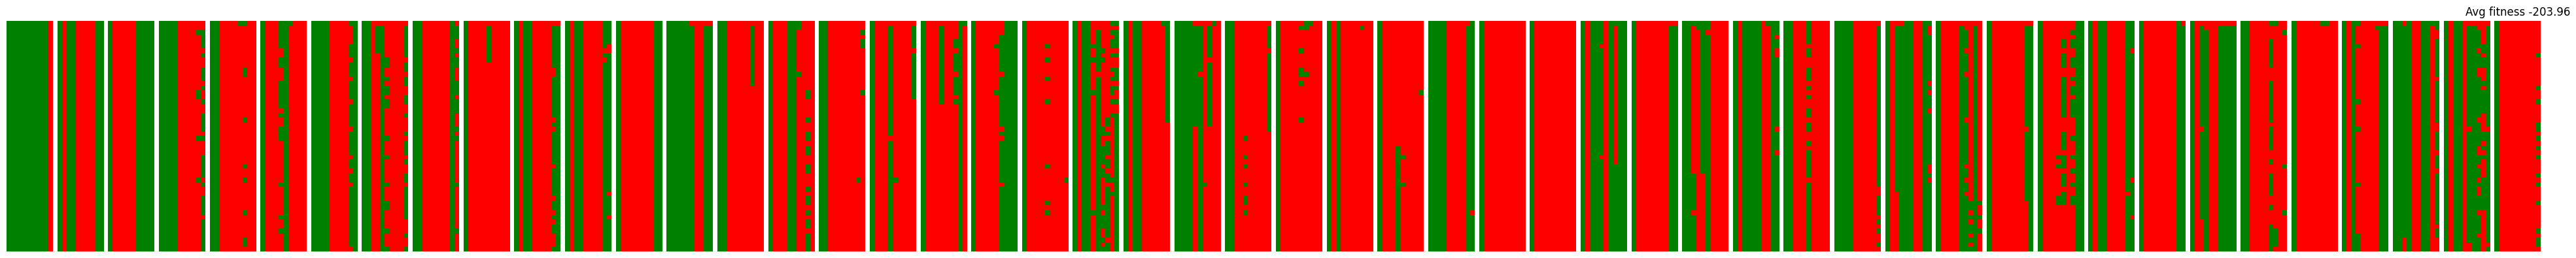

\\\\\\\\\\ Starting Generation 5 //////////
\\\\\\\\\\ Starting Generation 6 //////////
\\\\\\\\\\ Starting Generation 7 //////////
\\\\\\\\\\ Starting Generation 8 //////////
\\\\\\\\\\ Starting Generation 9 //////////


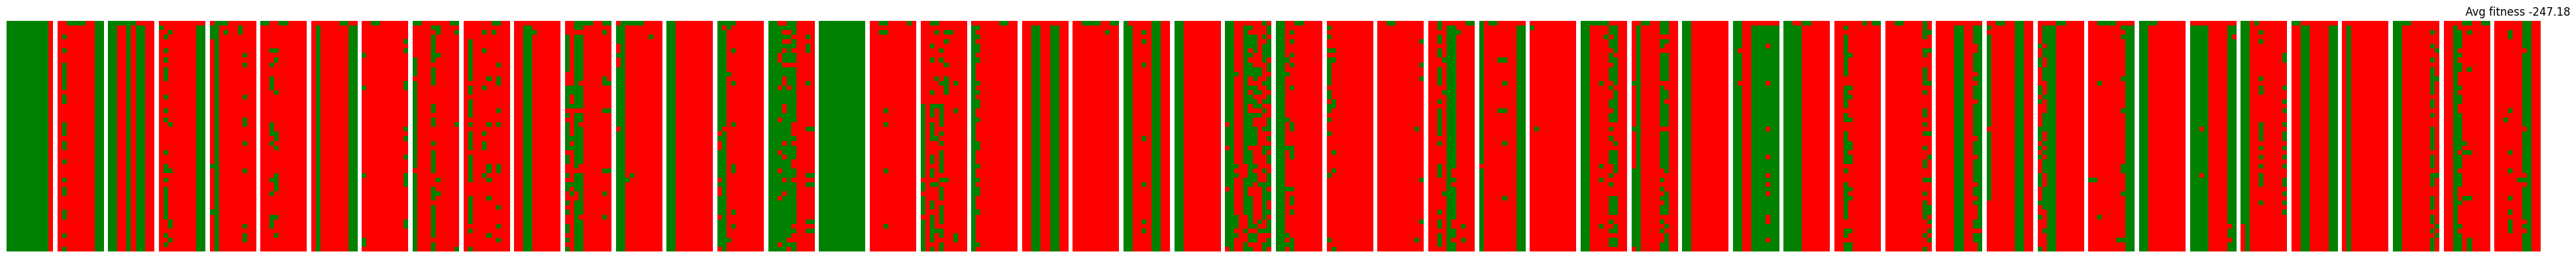

\\\\\\\\\\ Starting Generation 10 //////////
\\\\\\\\\\ Starting Generation 11 //////////
\\\\\\\\\\ Starting Generation 12 //////////
\\\\\\\\\\ Starting Generation 13 //////////
\\\\\\\\\\ Starting Generation 14 //////////


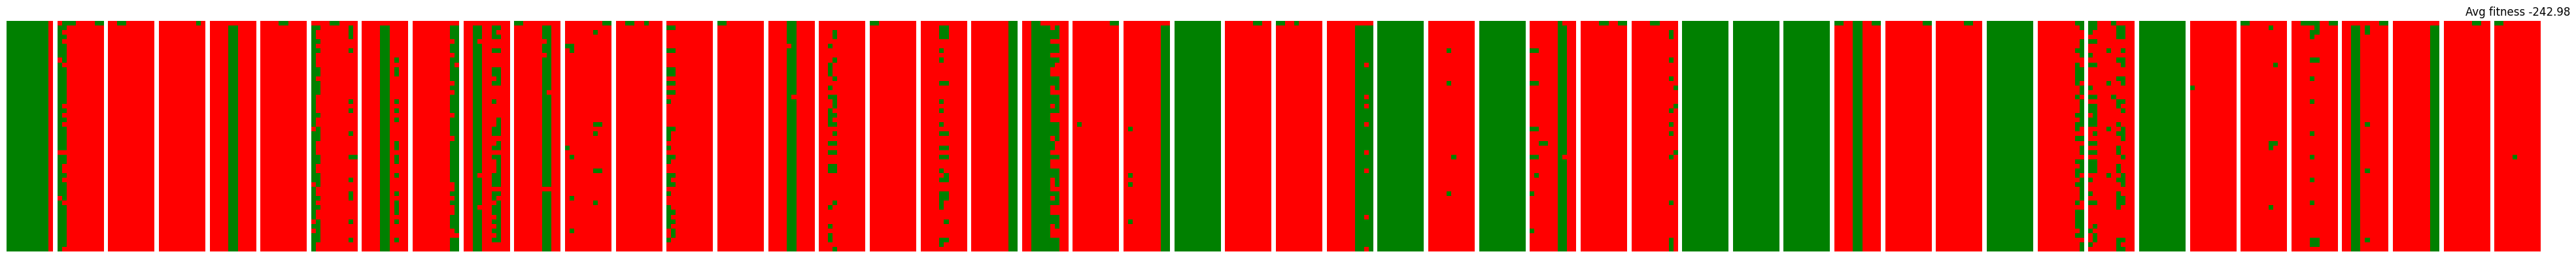

\\\\\\\\\\ Starting Generation 15 //////////
\\\\\\\\\\ Starting Generation 16 //////////
\\\\\\\\\\ Starting Generation 17 //////////
\\\\\\\\\\ Starting Generation 18 //////////
\\\\\\\\\\ Starting Generation 19 //////////


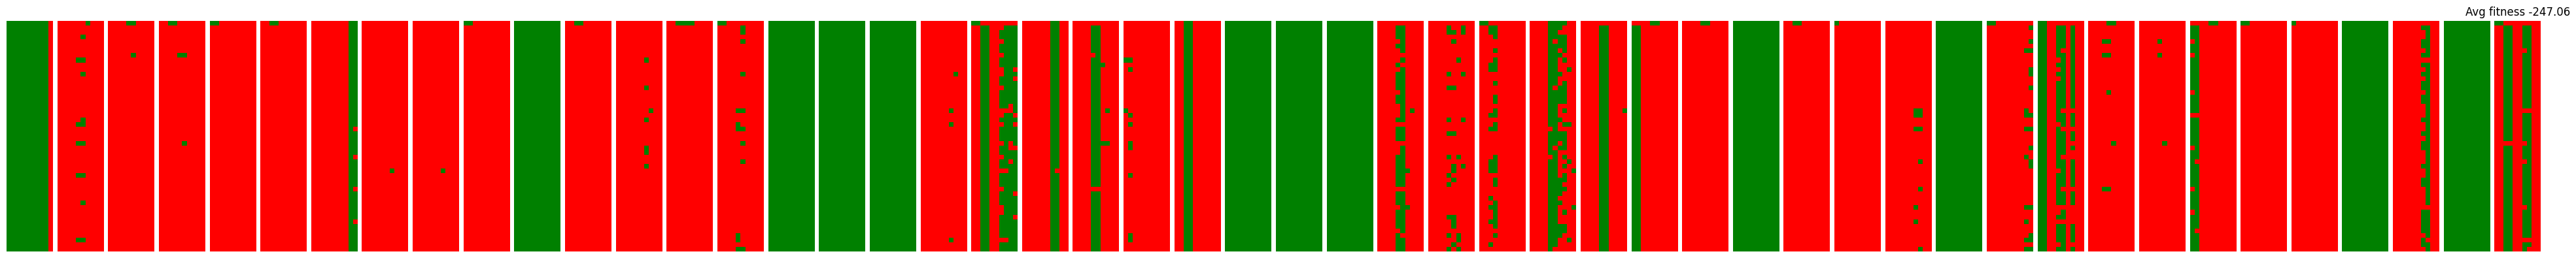

\\\\\\\\\\ Starting Generation 20 //////////
\\\\\\\\\\ Starting Generation 21 //////////
\\\\\\\\\\ Starting Generation 22 //////////
\\\\\\\\\\ Starting Generation 23 //////////
\\\\\\\\\\ Starting Generation 24 //////////


\\\\\\\\\\ Starting Generation 25 //////////
\\\\\\\\\\ Starting Generation 26 //////////
\\\\\\\\\\ Starting Generation 27 //////////
\\\\\\\\\\ Starting Generation 28 //////////
\\\\\\\\\\ Starting Generation 29 //////////


\\\\\\\\\\ Starting Generation 30 //////////
\\\\\\\\\\ Starting Generation 31 //////////
\\\\\\\\\\ Starting Generation 32 //////////
\\\\\\\\\\ Starting Generation 33 //////////
\\\\\\\\\\ Starting Generation 34 //////////


\\\\\\\\\\ Starting Generation 35 //////////
\\\\\\\\\\ Starting Generation 36 //////////
\\\\\\\\\\ Starting Generation 37 //////////
\\\\\\\\\\ Starting Generation 38 //////////
\\\\\\\\\\ Starting Generation 39 //////////


\\\\\\\\\\ Starting Generation 40 //////////
\\\\\\\\\\ Starting Generation 41 //////////
\\\\\\\\\\ Starting Generation 42 //////////
\\\\\\\\\\ Starting Generation 43 //////////
\\\\\\\\\\ Starting Generation 44 //////////


\\\\\\\\\\ Starting Generation 45 //////////
\\\\\\\\\\ Starting Generation 46 //////////
\\\\\\\\\\ Starting Generation 47 //////////
\\\\\\\\\\ Starting Generation 48 //////////
\\\\\\\\\\ Starting Generation 49 //////////


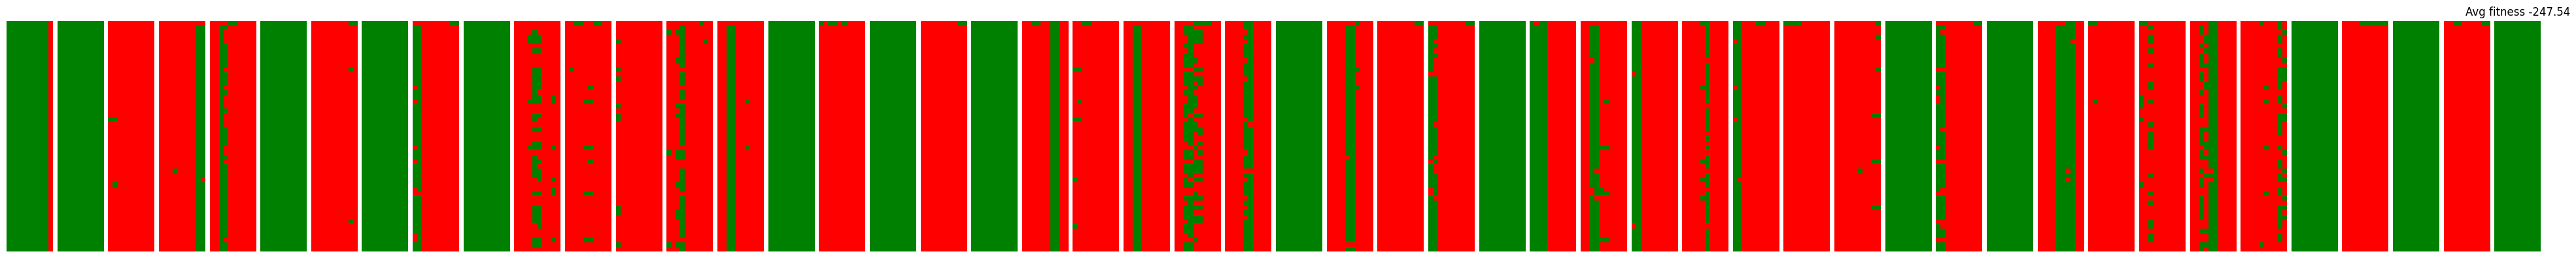

\\\\\\\\\\ Starting Generation 50 //////////
\\\\\\\\\\ Starting Generation 51 //////////
\\\\\\\\\\ Starting Generation 52 //////////
\\\\\\\\\\ Starting Generation 53 //////////
\\\\\\\\\\ Starting Generation 54 //////////


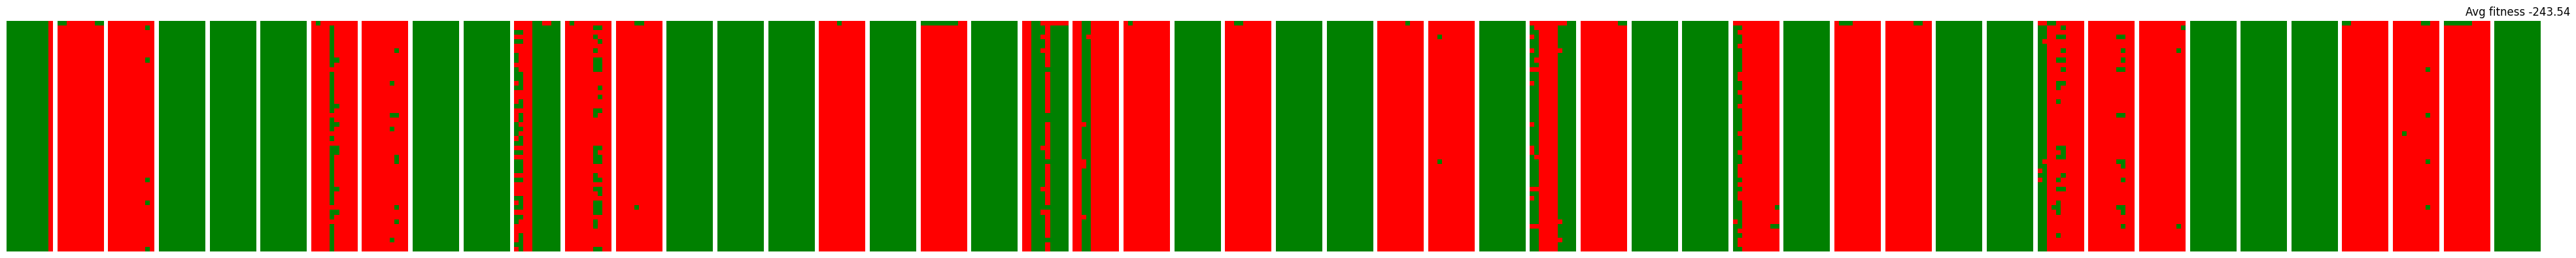

\\\\\\\\\\ Starting Generation 55 //////////
\\\\\\\\\\ Starting Generation 56 //////////
\\\\\\\\\\ Starting Generation 57 //////////
\\\\\\\\\\ Starting Generation 58 //////////
\\\\\\\\\\ Starting Generation 59 //////////


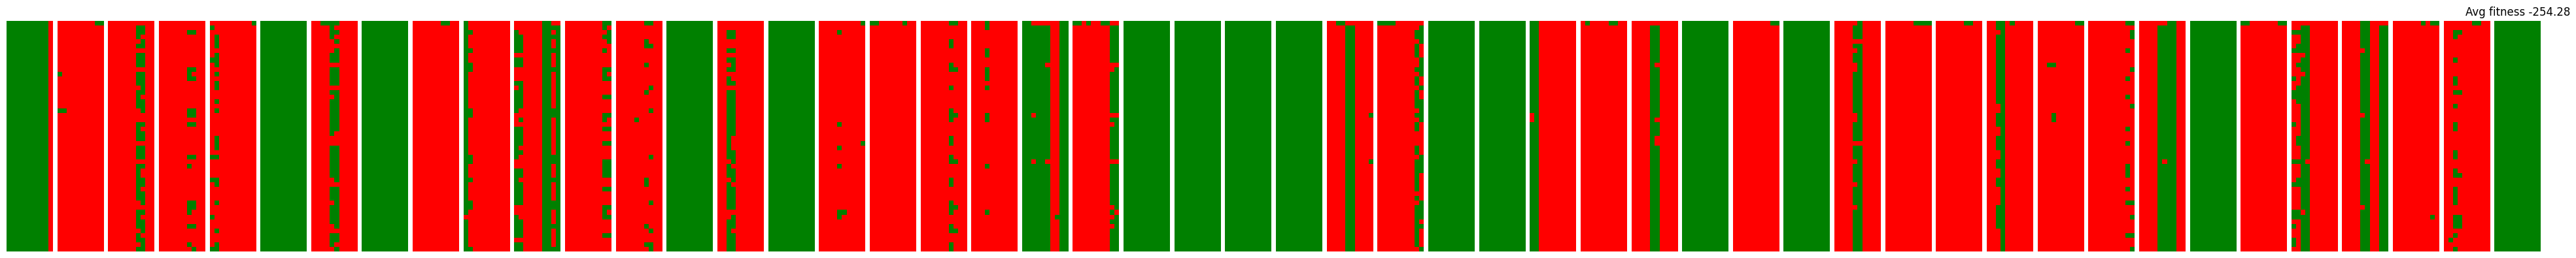

\\\\\\\\\\ Starting Generation 60 //////////
\\\\\\\\\\ Starting Generation 61 //////////
\\\\\\\\\\ Starting Generation 62 //////////
\\\\\\\\\\ Starting Generation 63 //////////
\\\\\\\\\\ Starting Generation 64 //////////


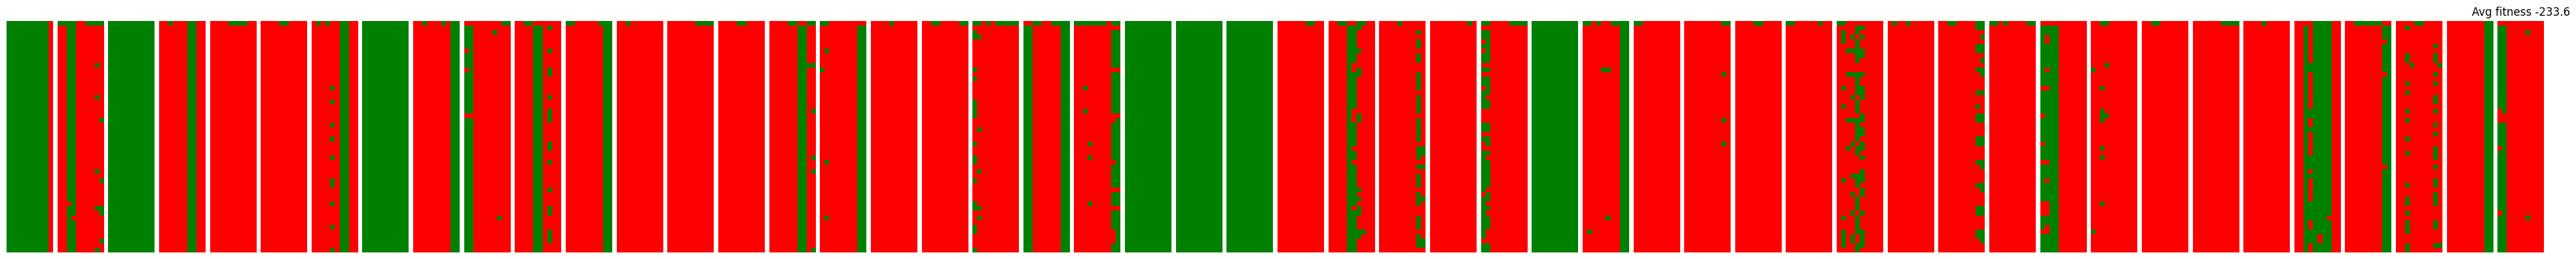

\\\\\\\\\\ Starting Generation 65 //////////
\\\\\\\\\\ Starting Generation 66 //////////
\\\\\\\\\\ Starting Generation 67 //////////
\\\\\\\\\\ Starting Generation 68 //////////
\\\\\\\\\\ Starting Generation 69 //////////


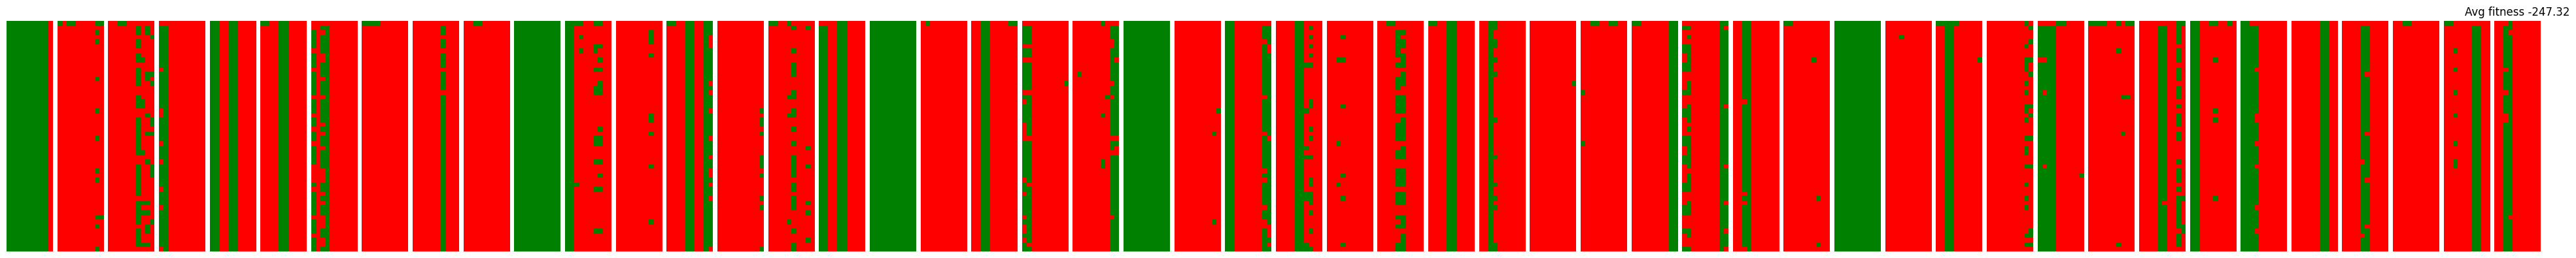

\\\\\\\\\\ Starting Generation 70 //////////
\\\\\\\\\\ Starting Generation 71 //////////
\\\\\\\\\\ Starting Generation 72 //////////
\\\\\\\\\\ Starting Generation 73 //////////
\\\\\\\\\\ Starting Generation 74 //////////


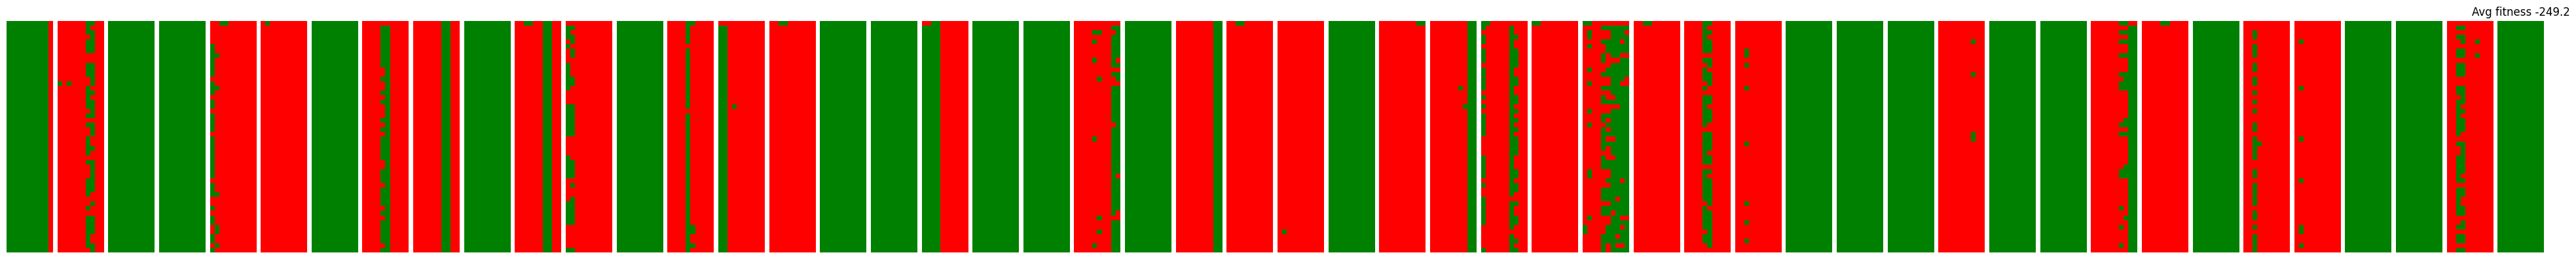

\\\\\\\\\\ Starting Generation 75 //////////
\\\\\\\\\\ Starting Generation 76 //////////
\\\\\\\\\\ Starting Generation 77 //////////
\\\\\\\\\\ Starting Generation 78 //////////
\\\\\\\\\\ Starting Generation 79 //////////


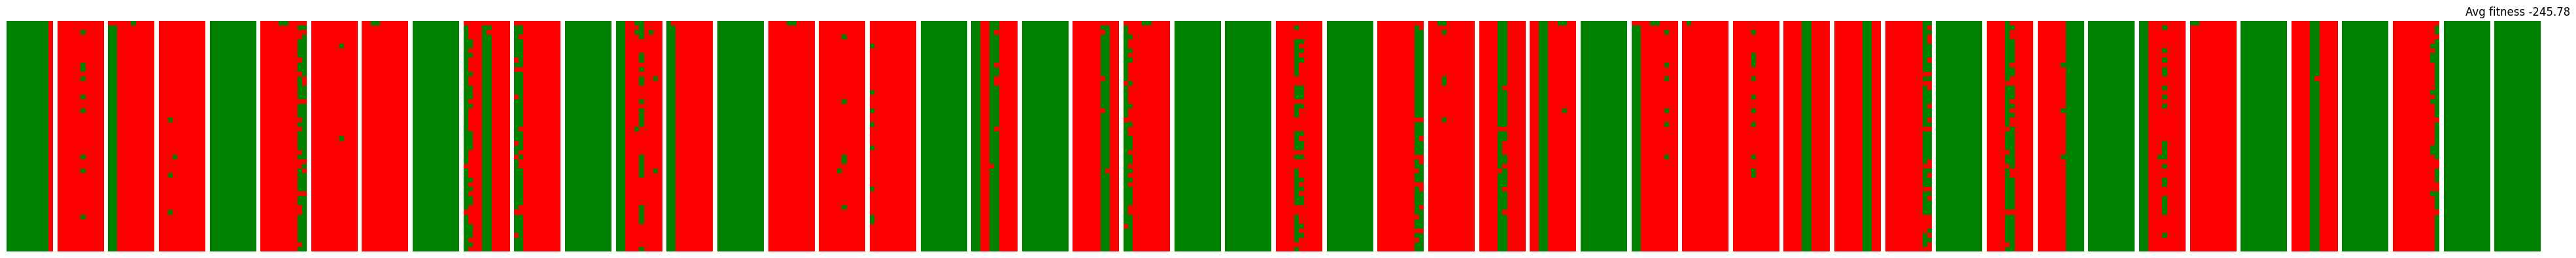

\\\\\\\\\\ Starting Generation 80 //////////
\\\\\\\\\\ Starting Generation 81 //////////
\\\\\\\\\\ Starting Generation 82 //////////
\\\\\\\\\\ Starting Generation 83 //////////
\\\\\\\\\\ Starting Generation 84 //////////


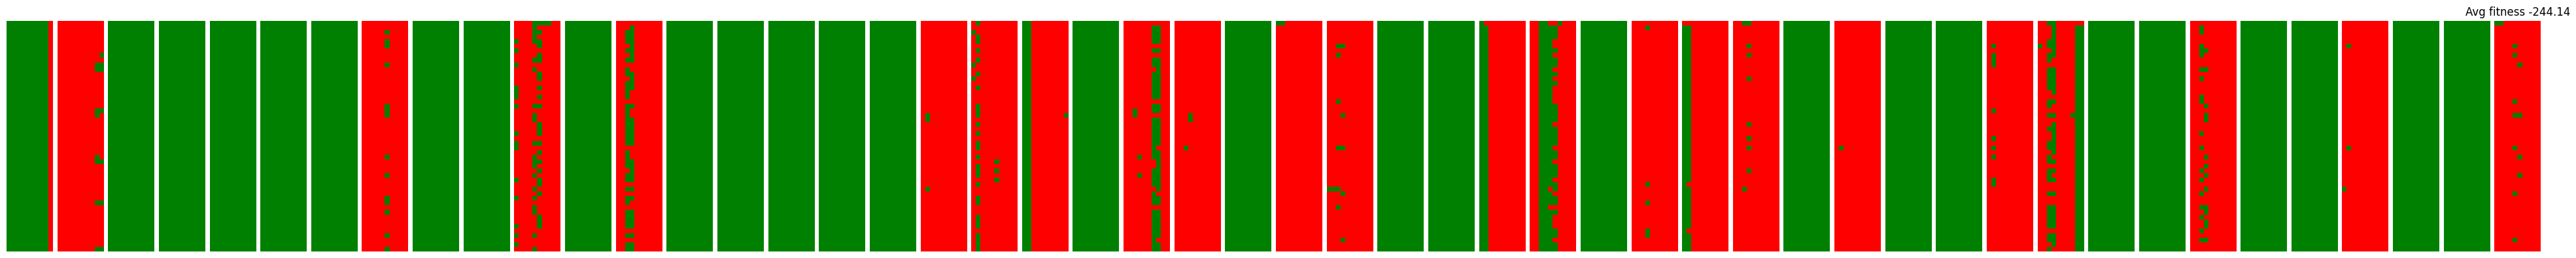

\\\\\\\\\\ Starting Generation 85 //////////
\\\\\\\\\\ Starting Generation 86 //////////
\\\\\\\\\\ Starting Generation 87 //////////
\\\\\\\\\\ Starting Generation 88 //////////
\\\\\\\\\\ Starting Generation 89 //////////


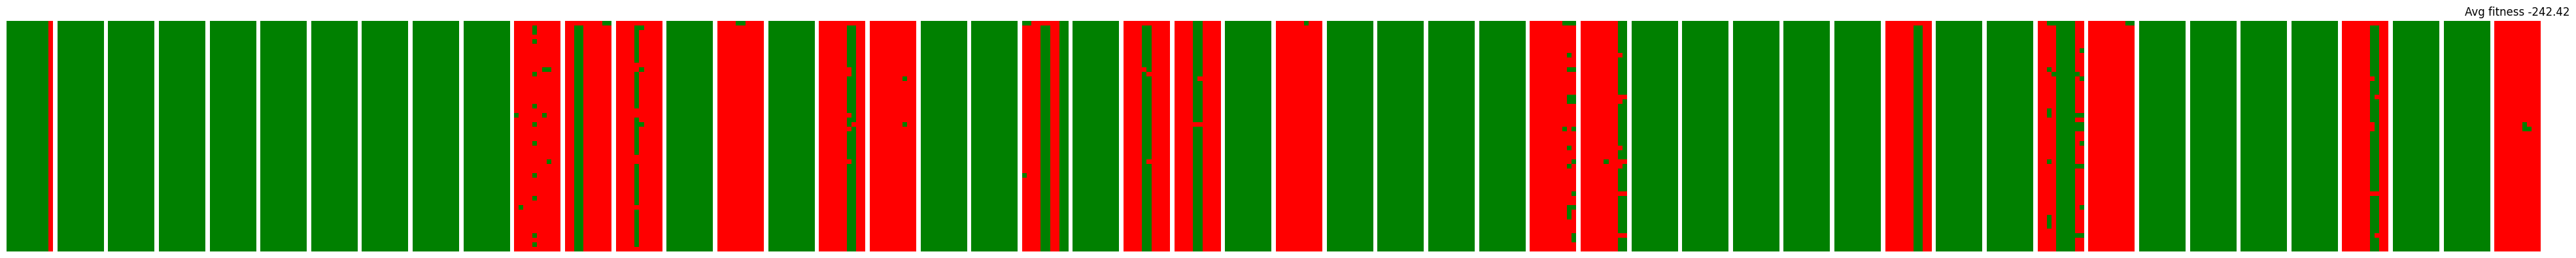

\\\\\\\\\\ Starting Generation 90 //////////
\\\\\\\\\\ Starting Generation 91 //////////
\\\\\\\\\\ Starting Generation 92 //////////
\\\\\\\\\\ Starting Generation 93 //////////
\\\\\\\\\\ Starting Generation 94 //////////


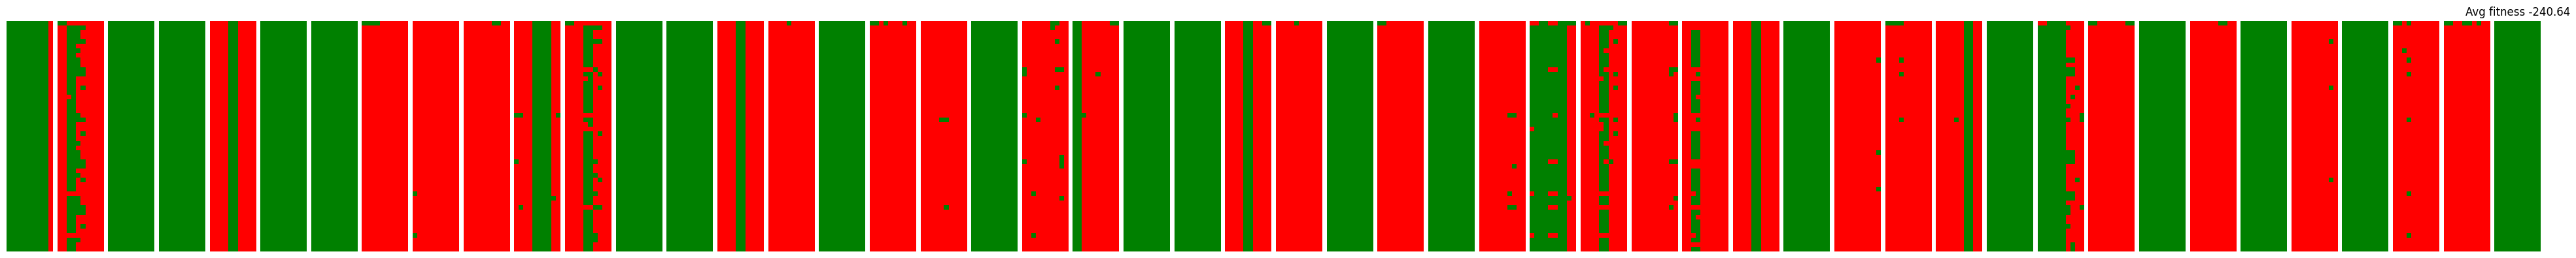

\\\\\\\\\\ Starting Generation 95 //////////
\\\\\\\\\\ Starting Generation 96 //////////
\\\\\\\\\\ Starting Generation 97 //////////
\\\\\\\\\\ Starting Generation 98 //////////
\\\\\\\\\\ Starting Generation 99 //////////


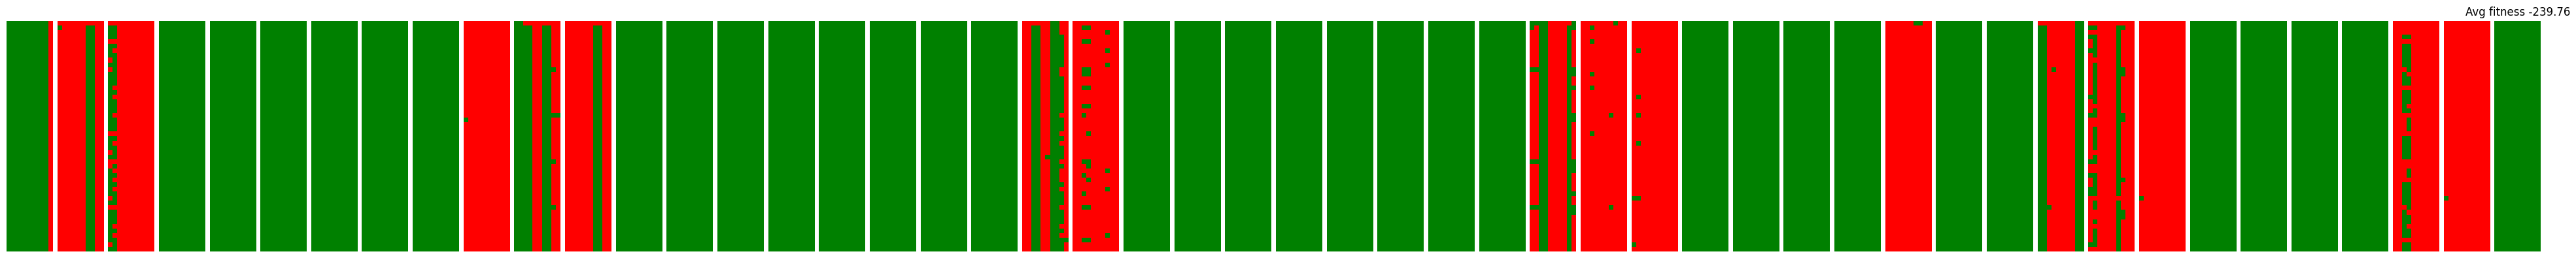

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


\\\\\\\\\\ Starting Generation 100 //////////
Parameters of the best solution : [ 2.13950563e-02  2.74038202e-02  5.71382494e-02  4.83889919e-01
  6.95631197e-02  3.15204909e-02  9.18833483e-02 -1.90978817e-02
  2.09014906e-02 -1.12029627e-02  5.12349066e-02  5.77172810e-04
 -8.77755634e-02 -6.59834903e-02 -7.41757418e-02 -5.80829395e-02
 -2.84266057e-02  8.20234968e-02  3.23086866e-02  5.74129761e-03
 -9.19820069e-02 -2.15703789e-02 -2.62871813e-02  7.44823862e-02
  7.96470028e-02 -7.33400359e-02 -4.69298315e-02  6.92466851e-02
 -7.53430548e-01  5.33444941e-02  5.48414120e-02 -6.93722603e-02
  2.82344860e-02 -9.11638555e-01  4.11213160e-02  4.32709631e-03
 -2.45054088e-01  2.32507982e-02 -4.41221866e-02  3.01529540e-02
  2.60165830e-02 -3.66750914e-02 -1.33736992e-02  7.71562957e-02
  9.95985384e-02  2.86726434e-02 -6.45895703e-02 -2.91004195e-02
  2.32109266e-02 -2.23617515e-01  7.21330700e-02 -6.97464645e-03
 -2.76591259e-02 -5.44723756e-02  1.58795483e-02 -5.59175435e-02
  2.922746

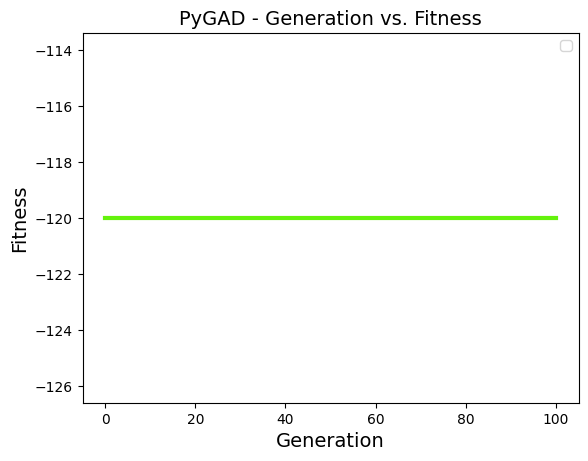

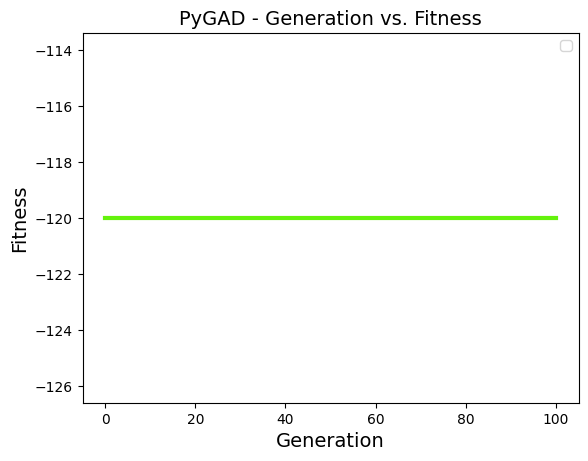

In [5]:
# create learning model

ga_instance = pygad.GA(num_generations=NUM_GENERATIONS,
                       num_parents_mating=NUM_PARENTS_MATING,
                       initial_population=initial_population,
                       parent_selection_type="sss",
                       fitness_func=fitness_func,
                       on_generation=callback_generation)

ga_instance.run()

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print(f"Parameters of the best solution : {solution}")
print(f"Fitness value of the best solution = {solution_fitness}")
print(f"Index of the best solution : {solution_idx}")
ga_instance.plot_fitness()

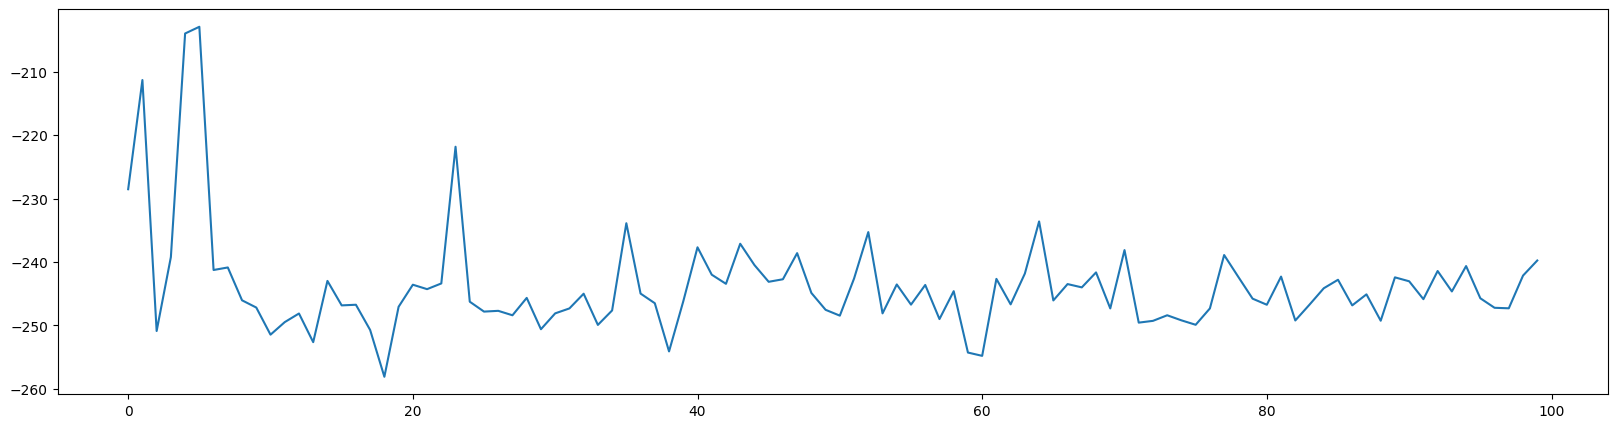

In [6]:
plt.figure(figsize=(20, 5))
plt.plot(range(len(fit_history)), fit_history)